## Import required packages.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt

from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

### 1B. Create a flight_df data frame by uploading the original data set into Python. Remove‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame. Convert ‘CARRIER’ and‘FL_STATUS’ into binary variables.

In [2]:
flight_df = pd.read_csv("FlightDelays.csv")
print("Number of Rows ",flight_df.shape[0])
print("Number of Columns: ",flight_df.shape[1],"\n"*2)

Number of Rows  2201
Number of Columns:  11 




In [3]:
#Removing two columns from the dataset
flight_df = flight_df.drop(columns=["DEST","ORIGIN"])
print("Updated Number of Columns: ",flight_df.shape[1],"\n"*2)

Updated Number of Columns:  9 




In [4]:
#Changing Ojects columns into Binary Columns
flight_df.CARRIER = flight_df.CARRIER.astype('category')
flight_df.FL_STATUS = flight_df.FL_STATUS.astype('category')
flight_df = pd.get_dummies(flight_df, prefix_sep='_', drop_first=True)
flight_df

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,FL_STATUS_ontime
0,1455,1455,184,5935,0,4,1,0,0,0,1,0,0,0,1
1,1640,1640,213,6155,0,4,1,1,0,0,0,0,0,0,1
2,1245,1245,229,7208,0,4,1,1,0,0,0,0,0,0,1
3,1715,1709,229,7215,0,4,1,1,0,0,0,0,0,0,1
4,1039,1035,229,7792,0,4,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,644,199,2761,0,6,31,0,0,0,0,1,0,0,1
2197,1700,1653,213,2497,0,6,31,0,0,0,0,1,0,0,1
2198,1600,1558,199,2361,0,6,31,0,0,0,0,1,0,0,1
2199,1359,1403,199,2216,0,6,31,0,0,0,0,1,0,0,1


### 2A. Develop in Python the predictor variables (14 variables) and outcome variable (‘FL_STATUS’) and partition the data set (60% for training and 40% for validation partitions). Train a logistic regression model using LogisticRegression() with the training 2 data set and display in Python the model’s parameters (intercept and regression coefficients). Provide these parameters in your report and also present the mathematical equation of the trained logistic regression model.

In [5]:
# Create predictors X and outcome y variables.
X = flight_df.drop(columns=['FL_STATUS_ontime'])
y = flight_df['FL_STATUS_ontime']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.051
Coefficients for Predictors
        SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  \
Coeff:     0.033    -0.034     0.009     0.0   -0.247   0.097   -0.021   

        CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  \
Coeff:        0.35       0.782      -1.054       0.236       -0.05   

        CARRIER_UA  CARRIER_US  
Coeff:       0.053      -0.043  


### 2B In Python, make predictions and identify probabilities p(0) and p(1) for the validation data set. For the first 20 records in the validation data set, display a table that contains the actual and predicted flight arrival status, and probabilities p(0) and p(1). Present this table in your report, and comment on the predicted vs. actual flight arrival status.

In [6]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition of First 20 Rows')
print(log_result.head(20))

Classification for Validation Partition of First 20 Rows
      Actual  Classification    p(0)    p(1)
1276       1               1  0.1392  0.8608
1446       1               1  0.0795  0.9205
335        1               1  0.0916  0.9084
1458       1               1  0.1136  0.8864
2038       1               1  0.0738  0.9262
1314       1               1  0.0672  0.9328
389        1               1  0.1599  0.8401
1639       1               1  0.1263  0.8737
2004       1               1  0.0951  0.9049
403        1               1  0.3002  0.6998
979        1               1  0.0488  0.9512
65         1               1  0.0691  0.9309
2105       1               1  0.1434  0.8566
1162       1               1  0.1037  0.8963
572        1               1  0.3036  0.6964
1026       0               1  0.0649  0.9351
1044       1               0  0.5242  0.4758
1846       0               1  0.4611  0.5389
1005       1               1  0.1545  0.8455
1677       1               1  0.0503  0.949

### 2C. Identify and display in Python confusion matrices for the training and validation partitions. Present them in your report and comment on accuracy (misclassification) rate for both partitions and explain if there is a possibility of overfitting.

In [7]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9015)

       Prediction
Actual    0    1
     0  141  120
     1   10 1049

Validation Partition
Confusion Matrix (Accuracy 0.8990)

       Prediction
Actual   0   1
     0  90  77
     1  12 702


### 2D. Create and display in Python the Lift chart only for ‘delayed’ flight status. For that, use p(0) for .sort_values() and p(0) in liftChart(). Also use ncols=1 in plt.subplots() for a single plot, and remove ax=axes[1] from liftChart(). Present this Lift chart in your report and briefly explain what the chart demonstrates and what conclusion(s) can be made.

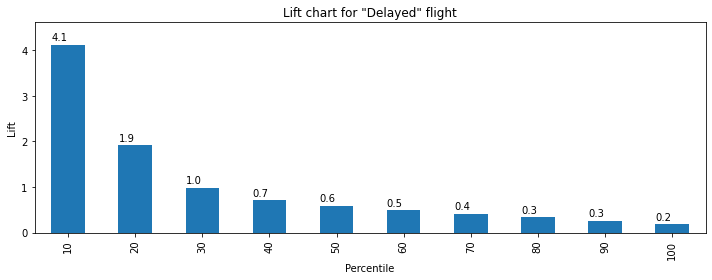

In [8]:
# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a data plot with two plots (ncols=2) back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 7.8 times as many 1's as would simply selecting 
# 10% of the records at random.

liftChart(df['p(0)'], title='Lift chart for "'"Delayed"'" flight')
 
# Display the charts. 
plt.tight_layout()
plt.show()

## 4. Extra Credit (Optional).

In [9]:
def train_model(variables):
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear', max_iter=500)
    model.fit(train_X[variables],train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y,model.predict(train_X[variables]),model)

best_model_be, best_variables_be = backward_elimination(train_X.columns, train_model, score_model, verbose=True)
print()
print('Best predictors after Backward Elimination:')
print()
print(best_variables_be)

Variables: SCH_TIME, DEP_TIME, DISTANCE, FL_NUM, WEATHER, WK_DAY, MTH_DAY, CARRIER_DH, CARRIER_DL, CARRIER_MQ, CARRIER_OH, CARRIER_RU, CARRIER_UA, CARRIER_US
Start: score=692.43
Step: score=619.37, remove MTH_DAY
Step: score=597.73, remove DISTANCE
Step: score=597.73, remove None

Best predictors after Backward Elimination:

['SCH_TIME', 'DEP_TIME', 'FL_NUM', 'WEATHER', 'WK_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']


## Making Model with Backward Elimination resulted Predictors

In [10]:
#defining the predictors and outome variable based on Backward Elimination

x_be = flight_df[best_variables_be]
y_be = flight_df["FL_STATUS_ontime"]

#partitioning the dataset.
train_x_be, valid_x_be, train_y_be, valid_y_be = train_test_split(x_be,y_be,test_size=0.4,random_state=1)

In [11]:
log_reg_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_be.fit(train_x_be, train_y_be)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors for training data')
print('Intercept:', np.round(log_reg_be.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg_be.coef_[0], decimals=3)}, 
                    index=x_be.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors for training data
Intercept: 1.018
Coefficients for Predictors
        SCH_TIME  DEP_TIME  FL_NUM  WEATHER  WK_DAY  CARRIER_DH  CARRIER_DL  \
Coeff:     0.033    -0.033     0.0   -1.659   0.082      -0.409       1.128   

        CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  
Coeff:       -1.22         1.0      -0.102       0.953       0.173  


In [12]:
# Make predictions for validation set using multiple predictors from backward elimination. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred_be = log_reg_be.predict(valid_x_be)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob_be = np.round(log_reg_be.predict_proba(valid_x_be), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result_be = pd.DataFrame({'Actual': valid_y_be, 
                    'Classification': log_pred_be,
                    'p(0)': [p[0] for p in log_prob_be],
                    'p(1)': [p[1] for p in log_prob_be]
})

print('Classification for Validation Partition of First 20 Rows')
print(log_result_be.head(20))

Classification for Validation Partition of First 20 Rows
      Actual  Classification    p(0)    p(1)
1276       1               1  0.1322  0.8678
1446       1               1  0.0728  0.9272
335        1               1  0.1059  0.8941
1458       1               1  0.0970  0.9030
2038       1               1  0.0582  0.9418
1314       1               1  0.0631  0.9369
389        1               1  0.0473  0.9527
1639       1               1  0.1029  0.8971
2004       1               1  0.0735  0.9265
403        1               1  0.3665  0.6335
979        1               1  0.0525  0.9475
65         1               1  0.1050  0.8950
2105       1               1  0.1029  0.8971
1162       1               1  0.1272  0.8728
572        1               1  0.3669  0.6331
1026       0               1  0.0674  0.9326
1044       1               1  0.4946  0.5054
1846       0               1  0.3907  0.6093
1005       1               1  0.1705  0.8295
1677       1               1  0.0556  0.944

In [13]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y_be, log_reg_be.predict(train_x_be))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y_be, log_reg_be.predict(valid_x_be))

Training Partition
Confusion Matrix (Accuracy 0.9083)

       Prediction
Actual    0    1
     0  147  114
     1    7 1052

Validation Partition
Confusion Matrix (Accuracy 0.9115)

       Prediction
Actual   0   1
     0  94  73
     1   5 709
